# 13. nodarbības atrisinājumi

1. uzdevums. **Attēlu pārveidošana**

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Attēla ielāde

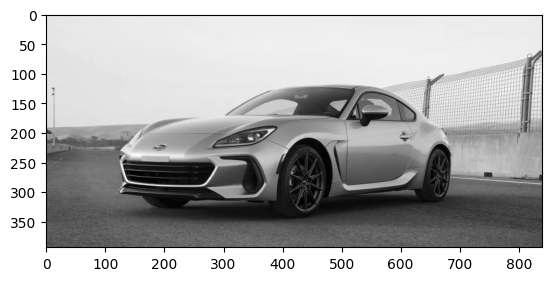

In [2]:
img = plt.imread('brz.jpg')
plt.imshow(img, vmax=255, cmap='gray')
plt.show()

Attēla matricas reizinājums ar 0,25

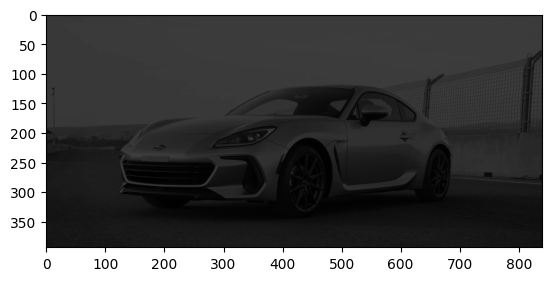

In [3]:
plt.imshow(0.25 * img, vmax=255, cmap='gray')
plt.show()

Attēla transponēšana

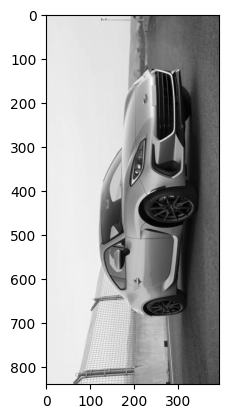

In [4]:
plt.imshow(img.T, vmax=255, cmap='gray')
plt.show()

Reizinājums ar diagonālo matricu

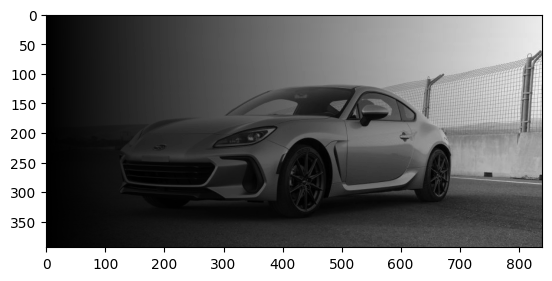

In [5]:
c1 = np.diag(np.linspace(0., 1., img.shape[1]))
plt.imshow(img @ c1, vmax=255, cmap='gray')
plt.show()

Reizinājums ar diagonālo matricu no kreisās puses

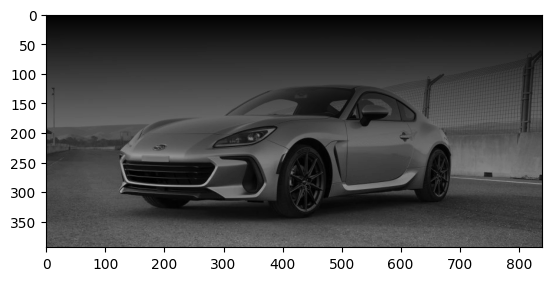

In [6]:
c2 = np.diag(np.linspace(0., 1., img.shape[0]))
plt.imshow(c2 @ img, vmax=255, cmap='gray')
plt.show()

2. uzdevums. **Datu aproksimācija**

Matemātiskais izvedums uzdevuma risināšanai:

Dots: $\hat{y} = (x; a_0, a_1) = a_0 +a_1x$ un $L(\vec{x}, \vec{y}; \vec{a}) = \sum_{i=1}^{N}\frac{[y_i - \hat{y}(x_i;\vec{a})]^2}{\sigma_i^2}$.

(1) Ievietojam doto $\hat{y}$ dotajā funkcijā (*Loss function*) $L(\vec{x}, \vec{y}; \vec{a})$. Iegūstam: $$ L(\vec{x}, \vec{y}; \vec{a}) = \sum_{i=1}^{N}\frac{y_i-a_0-a_1x_i)^2}{\sigma_i^2}$$

(2) Lokālajā minimumā visi parciālatvasinājumi būs vienādi ar 0. Rezultātā iegūsim:
$$\frac{\partial L}{\partial a_i} = 0 \Rightarrow \sum_{i=1}^{N}\frac{y_i-a_0-a_1x_i}{\sigma_i^2}~;~\sum_{i=1}^{N}\frac{x_i(y_i-a_0-a_1x_i)}{\sigma_i^2}$$

**NB!** Parciālatvasinājumi bija demonstrēti nodarbībā, tomēr šie vienādojumi ir gana vienkārši, lai izmēģinātu savas prasmes parciālatvasināšanā (arī drīkst lūgt palīdzību internetam, ja galīgi nav skaidrs, kā iegūst divas summas, veicot parciālatvasināšanu $\frac{\partial L}{\partial a_0}$ un $\frac{\partial L}{\partial a_1}$.

(3) Tagad var izveidot vienādojumu sistēmu, kuru varēs atrisināt, izmantojot Krāmera likumu (*Cramer's rule*).
$$
\left\{\begin{aligned}
    a_0\sum_{i=1}^N\frac{1}{\sigma_i^2}+a_1\sum_{i=1}^N\frac{x_i}{\sigma_i^2}&=\sum_{i=1}^N\frac{y_i}{\sigma_i^2}\\
    a_0\sum_{i=1}^N\frac{x_i}{\sigma_i^2}+a_1\sum_{i=1}^N\frac{x_i^2}{\sigma_i^2}&=\sum_{i=1}^N\frac{x_iy_i}{\sigma_i^2}
\end{aligned}\right.
$$
Lai būtu pārskatāmāk, izmantosim koeficientus:
$$
\begin{align*}
    X_0&=\sum_{i=1}^N\frac{1}{\sigma_i^2}
    & X_1&=\sum_{i=1}^N\frac{x_i}{\sigma_i^2}
    & X_2&=\sum_{i=1}^N\frac{x_i^2}{\sigma_i^2}\\
    Y_0&=\sum_{i=1}^N\frac{y_i}{\sigma_i^2}
    & Y_1&=\sum_{i=1}^N\frac{x_iy_i}{\sigma_i^2}
\end{align*}
$$
Rezultātā iegūst šādu vienādojumu sistēmu:
$$
\left\{\begin{aligned}
    a_0X_0+a_1X_1&=Y_0\\
    a_0X_1+a_1X_2&=Y_1
\end{aligned}\right.
$$
kuru varam atrisināt un atrast koeficientus $a_0$ un $a_1$:
$$
\begin{align*}
    a_0&=\frac{X_2Y_0-X_1Y_1}{X_0X_2-X_1^2}
    & a_1&=\frac{X_0Y_1-X_1Y_0}{X_0X_2-X_1^2}
\end{align*}
$$

**Pārējo paveic *Pyhton*, pareizi izmantojot *numpy* bibliotēku!**

3. uzdevums. **Grafiku pārveidošana**

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg as la
import csv

Funkcijas *xy(t)* definēšana.

In [ ]:
def xy(t):
    a, b = 3, 1
    h = -3/2
    r = 1
    xs = (a - b) * np.cos(t) + h * np.cos((a - b) * t / r)
    ys = (a - b) * np.sin(t) - h * np.sin((a - b) * t / r)
    return xs, ys

Masīva **t** definēšana, masīvu **x** un **y** izveide, izmantojot funkciju *xy(t)*. Grafika *x(t),y(t)* izveide.

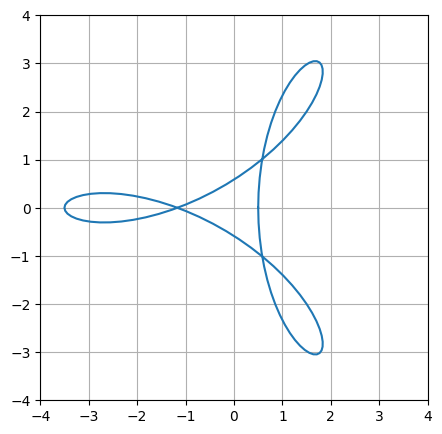

In [9]:
def plotP(xs, ys):
    plt.figure(figsize=(5, 5))
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.grid(True)
    plt.plot(xs, ys)
    plt.savefig("functions.pdf")
    plt.show()

ts = np.linspace(0, 2*np.pi, 101)

xs, ys = xy(ts)
plotP(xs, ys)

Funkcijas *rotate(phi)* definēšana.

In [10]:
def rotate(phi):
    return np.array([[np.cos(phi), -np.sin(phi)],[np.sin(phi), np.cos(phi)]])

mR = rotate(np.pi/6)

Masīvu **x** un **y** pagriešana, rezultāta atspoguļošana.

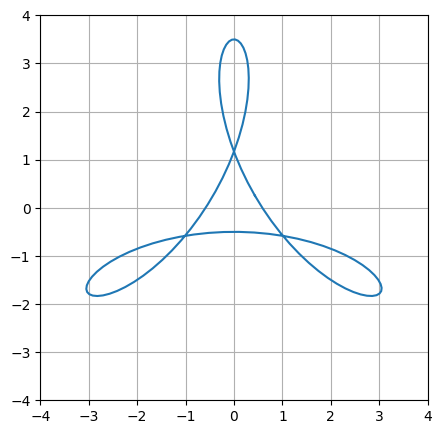

In [11]:
xys = np.vstack((xs, ys))

xys = mR @ xys

plotP(*xys)

Funkcijas *scale(kx=1, ky=1)* definēšana.

In [12]:
def scale(kx=1., ky=1.):
    return np.diag([kx, ky])

mS = scale(kx=3/4, ky=4/3)

Pagriezto masīvu **x** un **y** mērogošana, rezultāta atspoguļošana.

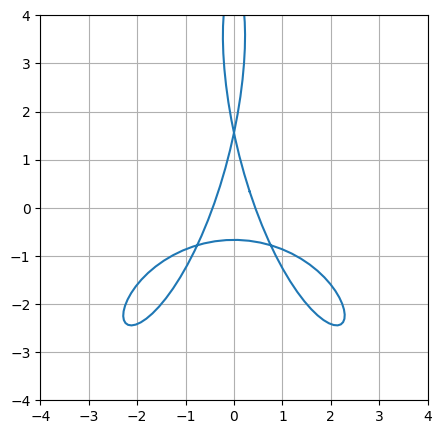

In [13]:
xys = mS @ xys

plotP(*xys)

Diagrammas pārvietošana.

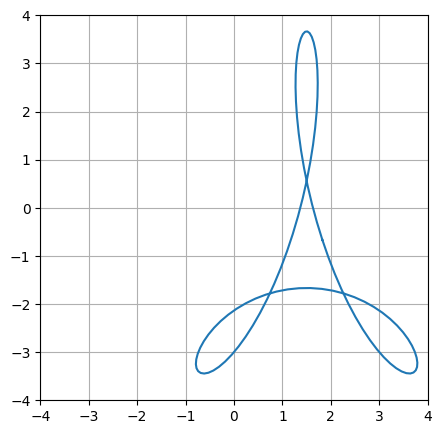

In [14]:
def shift(dx=0., dy=0., n=1):
    return np.array([[dx]*n, [dy]*n])

xys += shift(1.5, -1)
plotP(*xys)

Funkcijas *shear(sx=0, sy=0)* definēšana un pielietošana.

In [ ]:
def shear(sx=0, sy=0):
    return 1./(1.-sx*sy) * np.array([[1, -sx], [-sy, 1]])

mH = shear(sx=-0.25)

Masīvu **x** un **y** nobīde, izmantojot funkciju *shear(sx=0, sy=0)*, rezultātu atspoguļošana.

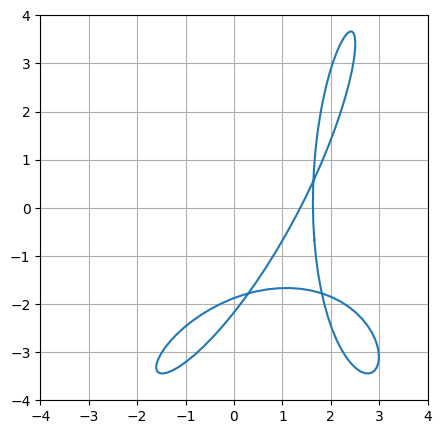

In [16]:
xys = mH @ xys

plotP(*xys)

Papildus uzdevums: izveidot vienu transformācijas matricu, kas pārveidos masīvus **x** un **y** atpakaļ sākotnējā stāvoklī.

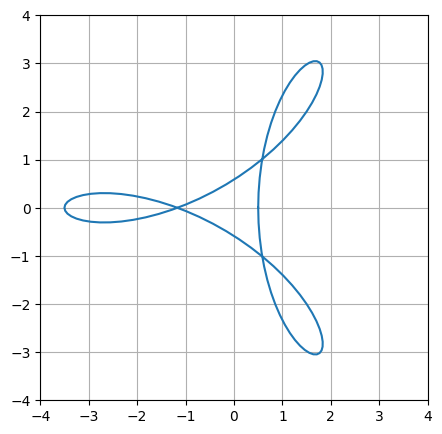

In [17]:
xys = np.pad(xys, (0, 1), 'constant', constant_values=1)

mH = la.block_diag(skew(sx=0.25), 1)
mT = np.hstack((np.eye(3, 2), [[-1.5],[1],[1]]))

mS = la.block_diag(scale(kx=4/3, ky=3/4), 1)
mR = la.block_diag(rotate(-np.pi/6), 1)

xys = mR @ mS @ mT @ mH @ xys
xys = xys[:-1, :-1]
plotP(*xys)